# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [3]:
sales = pd.read_csv("product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [4]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [27]:
#모델 생성
model = KMeans(n_clusters=3, random_state=0)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [29]:
model.fit(sales)
pred = model.predict(sales)

2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [30]:
sales['cluster'] = pred

sales.head(3)

,tot_price,visit_count,buy_count,avg_price,cluster,silhouette
0,5.0,0.2,3.0,1.6,1,0.790444
1,5.0,0.4,3.4,1.6,1,0.802792
2,5.2,0.2,3.5,1.5,1,0.806967


## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [31]:
salesDF = sales.drop(columns=['cluster'])

3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [32]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca = PCA(n_components=2)

# 주성분 학습과 2차원으로 변환 진행
pca_result = pca.fit_transform(salesDF)

#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x'] = pca_result[:,0]
sales['pca_y'] = pca_result[:,1]

3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

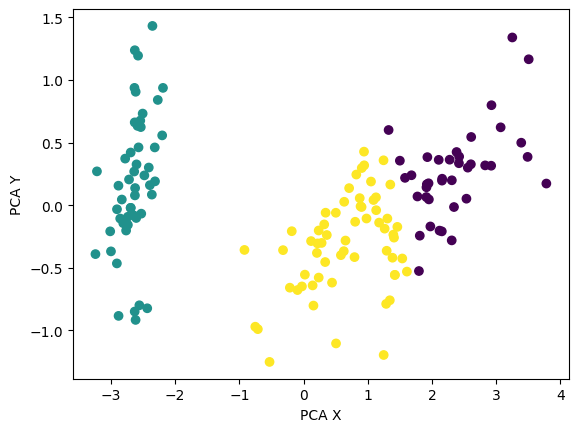

In [35]:
plt.scatter(sales['pca_x'], sales['pca_y'], c=sales['cluster'])
plt.xlabel('PCA X')
plt.ylabel('PCA Y')
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

In [36]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [37]:
#sales의 모든 데이터에 실루엣 계수 구하기
sil_values = silhouette_samples(salesDF, sales['cluster'])
sil_values

array([ 0.79114074,  0.80337193,  0.8073207 ,  0.78882794,  0.80064052,
        0.80218657,  0.7433056 ,  0.72283971,  0.68365966,  0.81290207,
        0.81475542,  0.76619595,  0.81290207,  0.76234684,  0.81929329,
        0.81616566,  0.65780383,  0.77309765,  0.76832213,  0.70699214,
        0.80183343,  0.77293727,  0.80306414,  0.780274  ,  0.82697824,
       -0.02697957,  0.36650992,  0.05758614,  0.58729453,  0.35169825,
        0.58248796,  0.34790655,  0.26805951,  0.32313831,  0.5753455 ,
        0.36869513,  0.57787409,  0.54330346,  0.47193873,  0.56272635,
        0.30180425,  0.55058607,  0.60242024,  0.48441305,  0.60498629,
        0.32025116,  0.57968958,  0.29548967,  0.46276589,  0.48728616,
        0.36739032,  0.09262856,  0.12035958,  0.54168924,  0.50488231,
        0.58930707,  0.55503072,  0.61149076,  0.25132956,  0.53647011,
        0.40805231,  0.13257542,  0.4762443 ,  0.60066907,  0.60783776,
        0.5887822 ,  0.49428255,  0.61520404,  0.29280058,  0.61

In [38]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette'] = sil_values

4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [39]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
overall_sil = silhouette_score(salesDF, sales['cluster'])
print('전체 평균 실루엣 계수:', overall_sil)

전체 평균 실루엣 계수: 0.532054934192537


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [26]:
#군집별 평균 실루엣 계수 구하기
cluster_sil = sales.groupby('cluster')['silhouette'].mean()
print('군집별 평균 실루엣 계수')
print(cluster_sil)

군집별 평균 실루엣 계수
cluster
0    0.421443
1    0.754441
2    0.436312
Name: silhouette, dtype: float64
